# 第二题：决策树处理回归任务

实验内容
1.	使用sklearn.tree.DecisionTreeRegressor完成kaggle房价预测问题
2.	计算最大深度为10的决策树，训练集上十折交叉验证的MAE和RMSE
3.	绘制最大深度从1到30，决策树在训练集和测试集上MAE的变化曲线
4.  选择一个合理的树的最大深度，并给出理由

## 1. 读取数据

In [1]:
import pandas as pd
data = pd.read_csv('data/kaggle_house_price_prediction/kaggle_hourse_price_train.csv')

In [2]:
# 丢弃有缺失值的特征（列）
data.dropna(axis = 1, inplace = True)

# 只保留整数的特征
data = data[[col for col in data.dtypes.index if data.dtypes[col] == 'int64']]

In [3]:
data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


## 2. 数据集划分

70%做训练集，30%做测试集

In [4]:
from sklearn.utils import shuffle

In [5]:
data_shuffled = shuffle(data, random_state = 32)
split_line = int(len(data_shuffled) * 0.7)
training_data = data_shuffled[:split_line]
testing_data = data_shuffled[split_line:]

## 3. 导入模型

In [6]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [7]:
from sklearn.tree import DecisionTreeRegressor

## 4. 选取特征和标记

In [8]:
features = data.columns.tolist()
target = 'SalePrice'
features.remove(target)

In [9]:
print(features)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


## 5. 训练与预测

请你在下面计算树的最大深度为10时，使用训练集全量特征训练的决策树的十折交叉验证的MAE和RMSE  

In [11]:
kaggle_x=training_data[features]
kaggle_y=training_data[target]

In [15]:
# YOUR CODE HERE
model = DecisionTreeRegressor(max_depth=10)
prediction = cross_val_predict(model,kaggle_x,kaggle_y,cv=10)

mae=mean_absolute_error(prediction,kaggle_y)
rmse=mean_squared_error(prediction,kaggle_y)**0.5

print("max_depth=10:\nMAE:",mae,"\nRMSE:",rmse)

max_depth=10:
MAE: 27351.259315919157 
RMSE: 44257.63399849179


###### 双击此处编辑
最大深度为10，全量特征的决策树，十折交叉验证指标

MAE|RMSE
-|-
27351.259315919157 |44257.63399849179

## 6. 改变最大深度，绘制决策树的精度变换图

绘制最大深度从1到30，决策树训练集和测试集MAE的变化图，要把两个曲线画在一张图内，横坐标是最大深度，纵坐标是MAE

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

import numpy as np

In [35]:
train_mae=[]
test_mae=[]

In [36]:
# YOUR CODE HERE
for i in range(1,31):
    model=DecisionTreeRegressor(max_depth=i)
    model.fit(training_data[features],training_data[target])
    train_pre=model.predict(training_data[features])
    test_pre=model.predict(testing_data[features])
    train_mae.append(mean_absolute_error(train_pre,training_data[target]))
    test_mae.append(mean_absolute_error(test_pre,testing_data[target]))

In [37]:
maxdepth=np.arange(1,31,1)
print(len(train_mae),len(test_mae),len(maxdepth))  

30 30 30


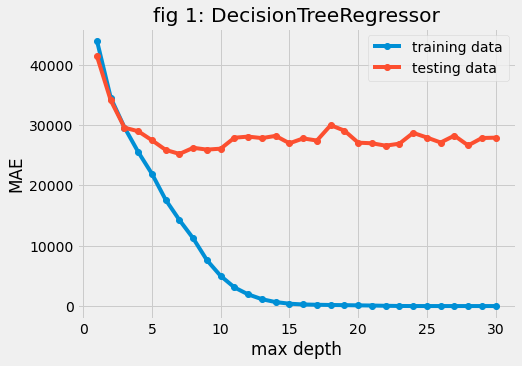

In [41]:
maxdepth=np.arange(1,31,1)

plt.figure(figsize = (7, 5))
plt.plot(maxdepth,train_mae, 'o-', label = 'training data')
plt.plot(maxdepth,test_mae, 'o-', label = 'testing data')
plt.xlabel("max depth")
plt.ylabel('MAE')
plt.title("fig 1: DecisionTreeRegressor")
plt.legend()

请你选择一个合理的树的最大深度，并给出理由
###### 双击此处编辑





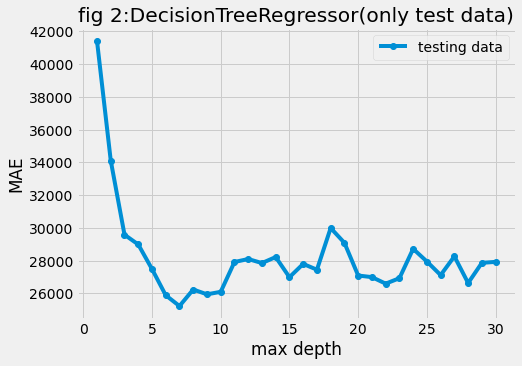

In [42]:
plt.figure(figsize = (7, 5))
plt.plot(maxdepth,test_mae, 'o-', label = 'testing data')
plt.xlabel("max depth")
plt.ylabel('MAE')
plt.title("fig 2:DecisionTreeRegressor(only test data)")
plt.legend()

选择最大深度为10的模型。

理由：由fig1可以知道，对于训练集数据，随着最大深度的增大，MAE的值逐渐减小至接近于0，模型训练效果不断变好。但观察fig2可知，当最大深度大于7时，模型在训练集数据上过拟合导致测试集上的MAE值开始增加。
综合两组数据，我认为选择最大深度为10，既保证了模型的训练效果，又不会产生过度过拟合现象。模型效果最好。